# Scripts to plot figures

In [ ]:
# imports
import matplotlib.pyplot as plt
import os
import pandas as pd
import seaborn as sns

# set plot style
sns.set_style('darkgrid')

In [ ]:
# let's plot one Pareto front
target_folder = "../local/2024-11-06-17-33-13-cell-model-optimization"
population_file = os.path.join(target_folder, "result.csv")

# read file(s), extract fitness values
df = pd.read_csv(population_file)
fitness_1_values = df["fitness_1"].values
fitness_2_values = df["fitness_2"].values

df_2 = pd.read_csv("../local/2024-11-06-18-09-12-cell-model-optimization/result.csv")

fig, ax = plt.subplots()
ax.scatter(fitness_1_values, fitness_2_values, alpha=0.3)
ax.scatter(df_2["fitness_1"].values, df_2["fitness_2"].values, color='orange', alpha=0.3)

ax.set_xlabel("fitness_1")
ax.set_ylabel("fitness_2")
ax.set_title("Pareto front from \"%s\"" % target_folder)

# A comparison between initial and final populations


In [16]:
import matplotlib.pyplot as plt
import os
import pandas as pd
import seaborn as sns

sns.set_style('darkgrid')

In [17]:
#target_folder = "../local/2024-11-07-18-03-12-cell-model-optimization/"
#target_folder = "../local/2024-11-08-16-20-26-cell-model-optimization"
#target_folder = "../local/2024-11-08-17-39-17-cell-model-optimization"
target_folder = "../local/2024-11-09-18-47-03-big-cell-model-optimization"
df_5 = pd.read_csv(os.path.join(target_folder, "42-population-generation-5.csv"))
df_10 = pd.read_csv(os.path.join(target_folder, "42-population-generation-10.csv"))
df_100 = pd.read_csv(os.path.join(target_folder, "42-population-generation-100.csv"))
df_400 = pd.read_csv(os.path.join(target_folder, "42-population-generation-400.csv"))
df_593 = pd.read_csv(os.path.join(target_folder, "42-population-generation-593.csv"))


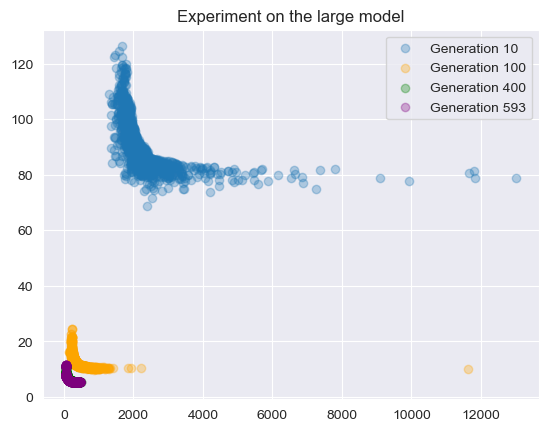

In [18]:
fig, ax = plt.subplots()
#ax.scatter(df_5["fitness_1"].values, df_5["fitness_2"].values, alpha=0.3, label="Generation 5")
ax.scatter(df_10["fitness_1"].values, df_10["fitness_2"].values, alpha=0.3, label="Generation 10")
ax.scatter(df_100["fitness_1"].values, df_100["fitness_2"].values, alpha=0.3, color="orange", label="Generation 100")
ax.scatter(df_400["fitness_1"].values, df_400["fitness_2"].values, alpha=0.3, color="green", label="Generation 400")
ax.scatter(df_593["fitness_1"].values, df_593["fitness_2"].values, alpha=0.3, color="purple", label="Generation 593")

# this is just to zoom in on a specific area
#ax.set_xlim([-0.05, 1.0])
#ax.set_ylim([-0.01, 0.2])

ax.set_title("Experiment on the large model")
# legend
ax.legend(loc='best')


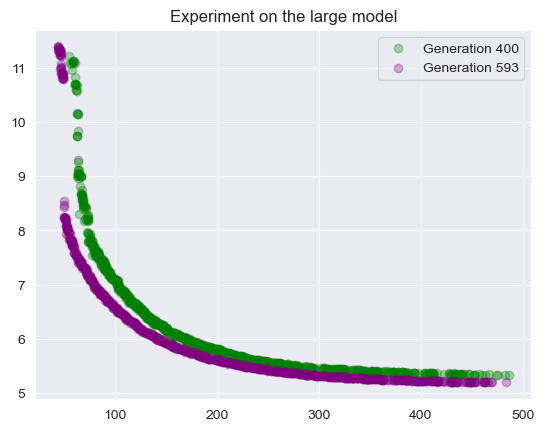

In [19]:
# zoom in on the final plot
fig, ax = plt.subplots()
ax.scatter(df_400["fitness_1"].values, df_400["fitness_2"].values, alpha=0.3, color="green", label="Generation 400")
ax.scatter(df_593["fitness_1"].values, df_593["fitness_2"].values, alpha=0.3, color="purple", label="Generation 593")

ax.set_title("Experiment on the large model")
ax.legend(loc='best')


In [ ]:
# find the extreme points on the Pareto front and print them
gen_10_worst_fitness_1 = df_10[df_10["fitness_1"] == df_10["fitness_1"].max()][["fitness_1", "fitness_2"]].values
gen_10_worst_fitness_2 = df_10[df_10["fitness_2"] == df_10["fitness_2"].max()][["fitness_1", "fitness_2"]].values

print("Worst fitness 1, gen 10:", gen_10_worst_fitness_1)
print("Worst fitness 2, gen 10:", gen_10_worst_fitness_2)

gen_100_worst_fitness_1 = df_100[df_100["fitness_1"] == df_100["fitness_1"].max()][["fitness_1", "fitness_2"]].values
gen_100_worst_fitness_2 = df_100[df_100["fitness_2"] == df_100["fitness_2"].max()][["fitness_1", "fitness_2"]].values

print("Worst fitness 1, gen 100:", gen_100_worst_fitness_1)
print("Worst fitness 2, gen 100:", gen_100_worst_fitness_2)

# Plot Pareto front with distance from ground truth

In [3]:
import matplotlib.pyplot as plt
import os
import pandas as pd
import seaborn as sns

from model.cell_model import MODEL
from utils import compute_distance_from_model

sns.set_style('darkgrid')

In [5]:
# in order to get the ground truth, we first need to build a model fixing the random seed
# and then get the indexes of the elements in the elasticity matrix that are actually modified
# by the evolutionary algorithm
model = MODEL()
model.MOO.build_model(seed=42)
labels = model.MOO.vectors["labels"]
elasticity = model.MOO.real_data["Elasticity"]

print(elasticity)
print("Labels:", labels)
# in the 'labels', the first element is the index of the elasticity matrix, 
# while the second element is the column
ground_truth = [elasticity[l[1]].loc[l[0]] for l in labels]
print("Ground truth:", ground_truth)
print("Fitness values for ground truth:", model.MOO.list_fitness())

 
 
Name of the removed parameter : Temperature
            B         C
v_0 -0.571077  0.000000
v_1  0.499998 -0.578952
v_2  0.000000  0.385375
Labels: [['v_0' 'B']
 ['v_1' 'B']
 ['v_1' 'C']
 ['v_2' 'C']]
Ground truth: [-0.5710765439105722, 0.4999980287933559, -0.578952321712635, 0.38537543232300786]
Fitness values for ground truth: [20.154772786759146, 0.0]


C:\Research\evolutionary-optimization-cell-models\src\model\layer_1\MOO.py:228: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  mask_float = matrix_real_data.applymap(lambda x: isinstance(x, (float, int)) and not isinstance(x, bool))


In [6]:
target_folder = "../local/2024-11-08-17-39-17-cell-model-optimization"
df_100 = pd.read_csv(os.path.join(target_folder, "42-population-generation-100.csv"))
individuals = df_100[["variable_0", "variable_1", "variable_2", "variable_3"]].values
distances = compute_distance_from_model(model, individuals)

[[-0.57107654  0.        ]
 [ 0.49999803 -0.57895232]
 [ 0.          0.38537543]]
[[-0.50100568 -0.        ]
 [ 0.49856542 -0.4998767 ]
 [-0.          0.49911307]]
[[-0.52808069 -0.        ]
 [ 0.46233695 -0.53550753]
 [-0.          0.35648208]]
[[-0.52646376 -0.        ]
 [ 0.46037631 -0.5761538 ]
 [-0.          0.38375736]]
[[-0.52114666 -0.        ]
 [ 0.47810707 -0.52833334]
 [-0.          0.46668765]]
[[-0.50097473 -0.        ]
 [ 0.49813009 -0.50105384]
 [-0.          0.49911307]]
[[-0.53208809 -0.        ]
 [ 0.46371497 -0.55460841]
 [-0.          0.43121909]]
[[-0.50097473 -0.        ]
 [ 0.49812531 -0.50028516]
 [-0.          0.49911307]]
[[-0.53240217 -0.        ]
 [ 0.46107542 -0.56270584]
 [-0.          0.4125346 ]]
[[-0.51694486 -0.        ]
 [ 0.4791361  -0.52634472]
 [-0.          0.46926717]]
[[-0.50883778 -0.        ]
 [ 0.49132516 -0.51119944]
 [-0.          0.48979479]]
[[-0.50470089 -0.        ]
 [ 0.49539788 -0.5059204 ]
 [-0.          0.49381352]]
[[-0.53173001 -0

[[-0.51631604 -0.        ]
 [ 0.47960338 -0.5276334 ]
 [-0.          0.46818469]]
[[-0.52976487 -0.        ]
 [ 0.46557844 -0.55034915]
 [-0.          0.44337086]]
[[-0.51505329 -0.        ]
 [ 0.48549339 -0.52031384]
 [-0.          0.48229932]]
[[-0.51434378 -0.        ]
 [ 0.4848828  -0.51881076]
 [-0.          0.48047761]]
[[-0.53598163 -0.        ]
 [ 0.46156482 -0.56515966]
 [-0.          0.41090776]]
[[-0.50542982 -0.        ]
 [ 0.49400573 -0.50761486]
 [-0.          0.49286405]]
[[-0.53265512 -0.        ]
 [ 0.46103093 -0.56702077]
 [-0.          0.40522673]]
[[-0.50846946 -0.        ]
 [ 0.49172795 -0.51051197]
 [-0.          0.48937272]]
[[-0.51678078 -0.        ]
 [ 0.483355   -0.52186038]
 [-0.          0.47590586]]
[[-0.50847448 -0.        ]
 [ 0.49145376 -0.51083211]
 [-0.          0.48779315]]
[[-0.51634103 -0.        ]
 [ 0.48198076 -0.5228208 ]
 [-0.          0.47329429]]
[[-0.53288513 -0.        ]
 [ 0.45986233 -0.56022271]
 [-0.          0.41958469]]
[[-0.53292128 -0

[[-0.52869058 -0.        ]
 [ 0.46888279 -0.54529164]
 [-0.          0.44311897]]
[[-0.53288513 -0.        ]
 [ 0.45986233 -0.56022271]
 [-0.          0.41253065]]
[[-0.52901015 -0.        ]
 [ 0.46115911 -0.55932167]
 [-0.          0.42368861]]
[[-0.52061026 -0.        ]
 [ 0.48010871 -0.52740633]
 [-0.          0.46915588]]
[[-0.52093638 -0.        ]
 [ 0.47805473 -0.52945147]
 [-0.          0.46877169]]
[[-0.53206445 -0.        ]
 [ 0.46307649 -0.55459348]
 [-0.          0.42420467]]
[[-0.5263252  -0.        ]
 [ 0.47456536 -0.53907317]
 [-0.          0.45556118]]
[[-0.53404894 -0.        ]
 [ 0.45979199 -0.56162427]
 [-0.          0.41660993]]
[[-0.5337695  -0.        ]
 [ 0.46098248 -0.57165122]
 [-0.          0.39938959]]
[[-0.51457903 -0.        ]
 [ 0.48513733 -0.52124081]
 [-0.          0.47555171]]
[[-0.53375576 -0.        ]
 [ 0.45941218 -0.56823466]
 [-0.          0.4053527 ]]
[[-0.53478437 -0.        ]
 [ 0.46188093 -0.56695946]
 [-0.          0.4080066 ]]
[[-0.52799132 -0

[[-0.53417818 -0.        ]
 [ 0.45969626 -0.56850158]
 [-0.          0.39659594]]
[[-0.52138483 -0.        ]
 [ 0.47962793 -0.52716354]
 [-0.          0.46884771]]
[[-0.50272365 -0.        ]
 [ 0.49823251 -0.5030114 ]
 [-0.          0.49680271]]
[[-0.52960012 -0.        ]
 [ 0.47129967 -0.54012572]
 [-0.          0.45136547]]
[[-0.53417265 -0.        ]
 [ 0.46081075 -0.57090848]
 [-0.          0.40409198]]
[[-0.51804092 -0.        ]
 [ 0.47893596 -0.52454605]
 [-0.          0.47123687]]
[[-0.50730274 -0.        ]
 [ 0.49356692 -0.5096453 ]
 [-0.          0.48988009]]
[[-0.5276791  -0.        ]
 [ 0.46830745 -0.54671712]
 [-0.          0.44467695]]
[[-0.51736552 -0.        ]
 [ 0.47960401 -0.52626629]
 [-0.          0.47287586]]
[[-0.50890948 -0.        ]
 [ 0.49122457 -0.50914701]
 [-0.          0.48936074]]
[[-0.52386144 -0.        ]
 [ 0.47239851 -0.53766457]
 [-0.          0.45748181]]
[[-0.53046732 -0.        ]
 [ 0.46407557 -0.55062769]
 [-0.          0.43576508]]
[[-0.50172533 -0

[[-0.53213999 -0.        ]
 [ 0.45860178 -0.57173844]
 [-0.          0.39705871]]
[[-0.51737883 -0.        ]
 [ 0.48009546 -0.52442874]
 [-0.          0.47287594]]
[[-0.51224174 -0.        ]
 [ 0.48580467 -0.51552067]
 [-0.          0.48184985]]
[[-0.53142379 -0.        ]
 [ 0.46033344 -0.57317356]
 [-0.          0.39345224]]
[[-0.53595332 -0.        ]
 [ 0.45970138 -0.56761014]
 [-0.          0.40797665]]
[[-0.52114666 -0.        ]
 [ 0.47757487 -0.52833334]
 [-0.          0.46846519]]
[[-0.5336067  -0.        ]
 [ 0.45950507 -0.55999196]
 [-0.          0.41933699]]
[[-0.5277453  -0.        ]
 [ 0.47205337 -0.53800225]
 [-0.          0.45379823]]
[[-0.53383133 -0.        ]
 [ 0.46059388 -0.57041879]
 [-0.          0.40522808]]
[[-0.50669301 -0.        ]
 [ 0.49132516 -0.50980804]
 [-0.          0.49085798]]
[[-0.52606922 -0.        ]
 [ 0.46774009 -0.54387626]
 [-0.          0.45235696]]
[[-0.53419441 -0.        ]
 [ 0.46209753 -0.57271467]
 [-0.          0.40367868]]
[[-0.52873437 -0

[[-0.52922324 -0.        ]
 [ 0.46725857 -0.54601814]
 [-0.          0.44237922]]
[[-0.50539001 -0.        ]
 [ 0.49485456 -0.50571196]
 [-0.          0.49361127]]
[[-0.51726049 -0.        ]
 [ 0.48194568 -0.52515964]
 [-0.          0.47273314]]
[[-0.53041205 -0.        ]
 [ 0.45969231 -0.57148043]
 [-0.          0.38988985]]
[[-0.53487515 -0.        ]
 [ 0.46211147 -0.55954002]
 [-0.          0.41686987]]
[[-0.52462925 -0.        ]
 [ 0.46958959 -0.5391994 ]
 [-0.          0.45189181]]
[[-0.51463271 -0.        ]
 [ 0.48495557 -0.51971266]
 [-0.          0.47794001]]
[[-0.50467751 -0.        ]
 [ 0.49567402 -0.50429952]
 [-0.          0.49458034]]
[[-0.50883605 -0.        ]
 [ 0.49107053 -0.50939989]
 [-0.          0.49039584]]
[[-0.50051384 -0.        ]
 [ 0.49920709 -0.50150324]
 [-0.          0.49804149]]
[[-0.5246373  -0.        ]
 [ 0.47208341 -0.53800225]
 [-0.          0.4535195 ]]
[[-0.52856177 -0.        ]
 [ 0.46589479 -0.5469149 ]
 [-0.          0.44869827]]
[[-0.53055901 -0

[[-0.53685081 -0.        ]
 [ 0.46072946 -0.56877415]
 [-0.          0.40456821]]
[[-0.51231944 -0.        ]
 [ 0.48625305 -0.51939122]
 [-0.          0.4802067 ]]
[[-0.53373917 -0.        ]
 [ 0.46047185 -0.56274584]
 [-0.          0.41269838]]
[[-0.52074223 -0.        ]
 [ 0.47977176 -0.52740633]
 [-0.          0.46890485]]
[[-0.53163818 -0.        ]
 [ 0.46728995 -0.55005181]
 [-0.          0.43612313]]
[[-0.51685299 -0.        ]
 [ 0.48495511 -0.51992425]
 [-0.          0.47794001]]
[[-0.5283456  -0.        ]
 [ 0.46890475 -0.54108087]
 [-0.          0.4501601 ]]
[[-0.53046929 -0.        ]
 [ 0.46802401 -0.55027997]
 [-0.          0.42871416]]
[[-0.53206964 -0.        ]
 [ 0.46307649 -0.55212667]
 [-0.          0.43037819]]
[[-0.53166679 -0.        ]
 [ 0.46459759 -0.54918371]
 [-0.          0.43701904]]
[[-0.51234737 -0.        ]
 [ 0.48663048 -0.51721597]
 [-0.          0.48176162]]
[[-0.51505329 -0.        ]
 [ 0.4851548  -0.52031384]
 [-0.          0.47705232]]
[[-0.53530303 -0

[[-0.53099049 -0.        ]
 [ 0.46241133 -0.57648133]
 [-0.          0.39064534]]
[[-0.53593441 -0.        ]
 [ 0.46166096 -0.57061932]
 [-0.          0.397687  ]]
[[-0.53511979 -0.        ]
 [ 0.46214544 -0.55968092]
 [-0.          0.41770446]]
[[-0.51671407 -0.        ]
 [ 0.48275523 -0.51983932]
 [-0.          0.47971711]]
[[-0.52151927 -0.        ]
 [ 0.47436544 -0.53263271]
 [-0.          0.46068571]]
[[-0.53132041 -0.        ]
 [ 0.46111696 -0.57655735]
 [-0.          0.38820727]]
[[-0.53119666 -0.        ]
 [ 0.46046546 -0.57191581]
 [-0.          0.39274091]]
[[-0.52677954 -0.        ]
 [ 0.46634881 -0.54121209]
 [-0.          0.45320921]]
[[-0.53218567 -0.        ]
 [ 0.46188412 -0.55971098]
 [-0.          0.42541604]]
[[-0.52138085 -0.        ]
 [ 0.47741833 -0.52691906]
 [-0.          0.46814708]]
[[-0.53513074 -0.        ]
 [ 0.46010684 -0.55984559]
 [-0.          0.4221725 ]]
[[-0.52131471 -0.        ]
 [ 0.47616207 -0.52810804]
 [-0.          0.46715095]]
[[-0.51632314 -0

[[-0.51231944 -0.        ]
 [ 0.48625305 -0.51957189]
 [-0.          0.4802366 ]]
[[-0.51706011 -0.        ]
 [ 0.47948404 -0.52466492]
 [-0.          0.47276688]]
[[-0.52651713 -0.        ]
 [ 0.47442614 -0.53774335]
 [-0.          0.45624401]]
[[-0.51044283 -0.        ]
 [ 0.48719222 -0.5163222 ]
 [-0.          0.48478963]]
[[-0.53059981 -0.        ]
 [ 0.46172019 -0.57345234]
 [-0.          0.39114539]]
[[-0.52423    -0.        ]
 [ 0.47427653 -0.53783685]
 [-0.          0.45952252]]
[[-0.53308605 -0.        ]
 [ 0.46175372 -0.55527048]
 [-0.          0.42899404]]
[[-0.53580397 -0.        ]
 [ 0.46194558 -0.56873159]
 [-0.          0.39800496]]
[[-0.53152991 -0.        ]
 [ 0.45998587 -0.5603837 ]
 [-0.          0.42010833]]
[[-0.52419862 -0.        ]
 [ 0.46944514 -0.53939168]
 [-0.          0.45380025]]
[[-0.53498714 -0.        ]
 [ 0.46214544 -0.5595408 ]
 [-0.          0.41770446]]
[[-0.53253796 -0.        ]
 [ 0.46097894 -0.57445464]
 [-0.          0.39007036]]
[[-0.50760864 -0

In [7]:
print(distances)

[0.15524556 0.07739041 0.05975476 0.11020964 0.15466796 0.07436953
 0.15505658 0.06334229 0.11476429 0.13943721 0.14669482 0.07587427
 0.07476309 0.15156099 0.13902144 0.15234234 0.07119671 0.07642841
 0.13776489 0.11160063 0.14992304 0.09424933 0.077445   0.14916454
 0.05635409 0.10151521 0.10807864 0.1103637  0.07339263 0.0628067
 0.14825615 0.11012943 0.08512038 0.0764608  0.14798298 0.08591088
 0.1244175  0.10795199 0.15500915 0.10607198 0.10730091 0.07928734
 0.07394459 0.15212749 0.1021789  0.08232218 0.13069971 0.12433912
 0.15105382 0.06054871 0.09234664 0.10227832 0.06851931 0.10029758
 0.05491097 0.10251322 0.13536674 0.11738453 0.09319263 0.133579
 0.15186095 0.08145137 0.1306841  0.05671089 0.08267806 0.05758694
 0.13030566 0.10411032 0.15026452 0.14117171 0.11520124 0.14227205
 0.13731244 0.11439425 0.14940793 0.15315292 0.14671979 0.13684282
 0.08722966 0.1117765  0.14768194 0.05969227 0.12536815 0.05504765
 0.14570958 0.0797617  0.08041917 0.06030011 0.10241658 0.0944957

Individual [0.53416439 0.46520602 0.57170121 0.38350638] has the smallest distance 0.0513


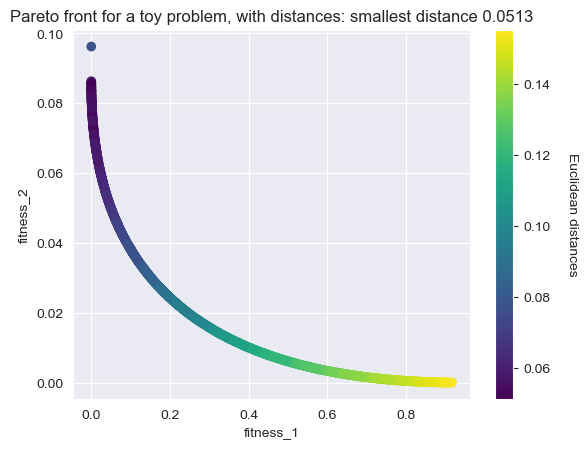

In [15]:
fig, ax = plt.subplots()
object_pointer = ax.scatter(df_100["fitness_1"].values, df_100["fitness_2"].values, c=distances, cmap='viridis')
cbar = plt.colorbar(object_pointer)
cbar.set_label('Euclidean distances', rotation=270, labelpad=20)
ax.set_xlabel("fitness_1")
ax.set_ylabel("fitness_2")
ax.set_title("Pareto front for a toy problem, with distances: smallest distance %.4f"
            % distances.min())

smallest_distance_index = distances.argmin()
print("Individual %s has the smallest distance %.4f" %
     (str(individuals[smallest_distance_index]), distances[smallest_distance_index]))

# Figures for the EvoSTAR paper

The code below is a bit cut-and-pasted from the code above, focusing on the results of the experiments for the paper.

In [1]:
import matplotlib.pyplot as plt
import os
import pandas as pd
import seaborn as sns

sns.set_style('darkgrid')

In [2]:
# load the data from the different CSV files, organize it in a dictionary
small_model_folder = "../local/2024-11-12-14-00-37-cell-model-optimization"
generations_to_plot = ["10", "20", "100"]

dfs = {g : pd.read_csv(os.path.join(small_model_folder, "42-population-generation-%s.csv" % g)) 
       for g in generations_to_plot}

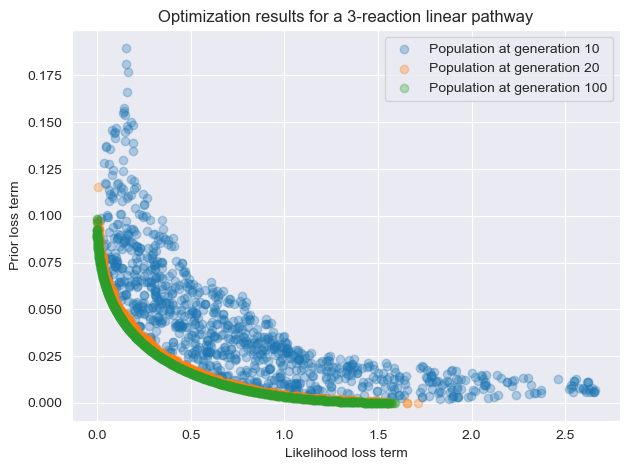

In [4]:
fig, ax = plt.subplots()

for g in dfs :
    ax.scatter(dfs[g]["fitness_1"].values, dfs[g]["fitness_2"].values, 
               alpha=0.3, label="Population at generation %s" % g)

ax.set_xlabel("Likelihood loss term")
ax.set_ylabel("Prior loss term")
ax.set_title("Optimization results for a 3-reaction linear pathway")
ax.legend(loc='best')
fig.tight_layout()

plt.savefig(os.path.join(small_model_folder, "pareto-fronts.png"), dpi=300)

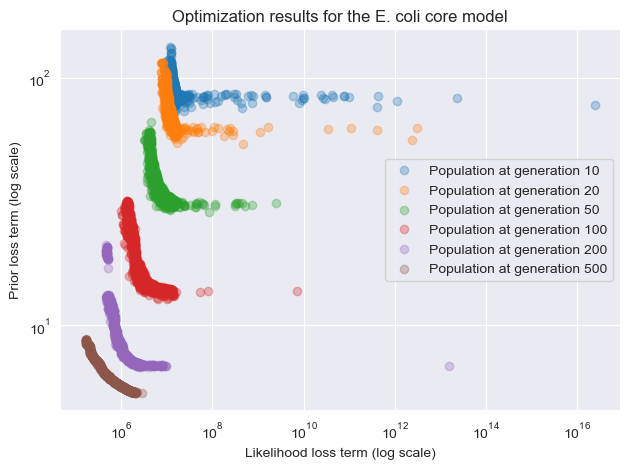

In [5]:
# now, for plotting the results of the big model, there is an issue: some of the values for the objectives
# are so large that they completely screw up the axis scales
big_model_folder = "../local/2024-11-12-15-51-50-cell-model-big-optimization"
generations_to_load = ["10", "20", "50", "100", "200", "300", "400", "500"]
generations_to_plot = ["10", "20", "50", "100", "200", "500"]

dfs = {g : pd.read_csv(os.path.join(big_model_folder, "42-population-generation-%s.csv" % g)) 
       for g in generations_to_load}

fig, ax = plt.subplots()

for g in generations_to_plot :
    ax.scatter(dfs[g]["fitness_1"].values, dfs[g]["fitness_2"].values, 
               alpha=0.3, label="Population at generation %s" % g)

ax.set_xscale('log')
ax.set_yscale('log')

ax.set_xlabel("Likelihood loss term (log scale)")
ax.set_ylabel("Prior loss term (log scale)")
ax.set_title("Optimization results for the E. coli core model")
ax.legend(loc='best')

fig.tight_layout()
plt.savefig(os.path.join(big_model_folder, "pareto-fronts.png"), dpi=300)

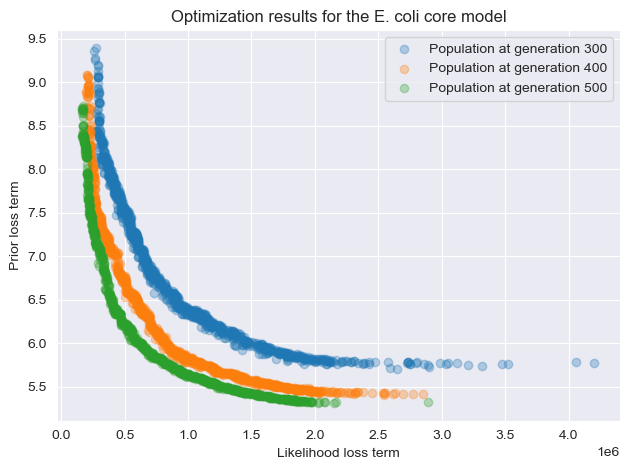

In [6]:
# zoom in on the last generations
zoom_in_generations = ["300", "400", "500"]

dfs = {g : pd.read_csv(os.path.join(big_model_folder, "42-population-generation-%s.csv" % g)) 
       for g in generations_to_load}

fig, ax = plt.subplots()

for g in zoom_in_generations :
    ax.scatter(dfs[g]["fitness_1"].values, dfs[g]["fitness_2"].values, 
               alpha=0.3, label="Population at generation %s" % g)

#ax.set_xscale('log')
#ax.set_yscale('log')
    
ax.set_xlabel("Likelihood loss term")
ax.set_ylabel("Prior loss term")
ax.set_title("Optimization results for the E. coli core model")
ax.legend(loc='best')

fig.tight_layout()
plt.savefig(os.path.join(big_model_folder, "pareto-fronts-zoomed.png"), dpi=300)